In [1]:
import numpy as np
from scipy.integrate import odeint

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def rhs_with_drag(r, t, b=1.0, c=1.0, g=9.8, m=1.0):
    x,y,vx,vy = r
    
    vsq = vx**2 + vy**2
    vmag = np.sqrt(vsq)
    
    dx = vx
    dy = vy
    dvx = - b*vx/m - c*vsq*vx/(vmag*m)
    dvy = -g - b*vy/m - c*vsq*vy/(vmag*m)
    
    return np.array([dx, dy, dvx, dvy])

In [4]:
times = np.linspace(0,1,1000)
q0 = (0, 0, 10, 10)
result = odeint(rhs_with_drag, q0, times)

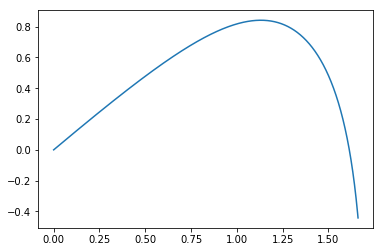

In [5]:
plt.plot(result[:,0], result[:,1])

In [33]:
def model_data(x0=0, y0=0, vx0=10.0, vy0=10.0, b=1.0, c=1.0, m=1, tmax=1.0):
    ic = (x0, y0, vx0, vy0)
    times = np.linspace(0,tmax,1000)
    result = odeint(rhs_with_drag, ic, times, args=(b,c,9.8,m))
    return result

Now we need to add uncertainty. It might:

- have absolute and relative components
- depend on velocity
- there might be uncertainties in v as well as x (ignore for now)

In [7]:
np.random.random((3,3))

array([[ 0.11738265,  0.88492039,  0.39496716],
       [ 0.66558917,  0.2668067 ,  0.0561486 ],
       [ 0.29155877,  0.75786626,  0.90427809]])

In [17]:
def uncertainty(results, mag):
    unc_1d = np.random.normal(scale=mag, size=results.size)
    return unc_1d.reshape(results.shape)

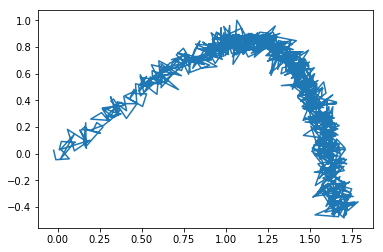

In [20]:
no_unc = model_data(c=0.1)
unc = uncertainty(no_unc, 0.05)

modeled = no_unc + unc

plt.plot(modeled[:,0], modeled[:,1])

In [11]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution.
    size : int or tuple of ints, optional
        Output shap

In [24]:
def fit_badness_for_parameters(parameters, data, rhs, ic, tmax=1.0):
    """Measure the badness of the fit for a particular set of parameters."""
    
    times = np.linspace(0,tmax, data.shape[0])
    result = odeint(rhs, ic, times, args=parameters)
 
    difference = result - data
    badness = np.sum(difference**2)
    return badness

In [39]:
no_unc = model_data(c=0.1)
unc = uncertainty(no_unc, 0.05)
modeled = no_unc + unc

ic = (0,0,10,10)
parameters = (1.0,0.1, 9.8, 1.0)
fit_badness_for_parameters(parameters, modeled, rhs_with_drag, ic)

9.8751783391047514